Visualization in Python
==========

*Module instructor:* Marie-Eve Picard
<br>*Course:* PSY6983 (Summer 2025)

*Material adapted from:* Peer Holtz and Jacob Vogel

<div class="alert alert-block alert-info">
<b>Acknowledgement</b>    
    
This notebook is an adaptation from the one that was created by Peer Holz as part of the QLSC 612 course in 2020. The original material can be found <a href="https://github.com/neurodatascience/course-materials-2020/blob/master/lectures/14-may/01-data-visualization/python_visualization_for_data.ipynb">here</a>. The material from Peer's tutorial was also adapted from a presentation by Jacob Vogel.
    
<br>
The current notebook aims to centralize the information from the initial jupyter notebook with the information from the presentation slides. Other reference: IFT6758 - Science des Données (Cours 6: Visualisation avancée des données; Gauthier Gidel - septembre 2023).
  

<br>
<br>This presentation is using the <a href="https://rise.readthedocs.io/en/latest/index.html">rise extension</a> on jupyter notebook (version 6.5.6) to present the cells as slides.
</div>

**Goal of this module**

- Discuss the purpose of visualization
- Discuss some visualization principles
- Learn how to create figures in Python



**All the graphics...**

- Python provides a wide array of options
- Low-level vs high-level plotting APIs
- Static images vs. HTML output vs. interactive plots
- Domain-general and domain-specific packages
- Diffent domain-general modules to visualize your data:
    - matplotlib: based on MATLAB
    - seaborn and pandas: based on matplotlib
    - bokeh and plotly: interactive figures

**Before we go farther...**

Make sure you have installed the following requirements in your venv:
- matplotlib: `pip install matplotlib` or `conda install matplotlib`
- seaborn: `pip install seaborn` or `conda install seaborn`
- ptitprince: `pip install ptitprince`
- statsmodels: `pip install statsmodels`
- colorcet (optional): `pip install colorcet`
- nilearn (optional): `pip install nilearn`

Make sure you have installed the data:
- [OpenNeuro dataset ds000228 "MRI data of 3-12 year old children and adults during viewing of a short animated film"](https://openneuro.org/datasets/ds000228/versions/1.0.0) : participants.tsv

In [1]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**Visualizations are useful for...**

- Understanding your data
    - Helping understand the complexity of your data
    - Getting a sense of how your data are distributed
- Presentating your results
    - Supporting your results
    - Sharing a message

In [2]:
# Data downloaded from https://www.kaggle.com/datasets/tombutton/datasaurusdozen
# Credit: Alberto Cairo (original datasaurus), and Justin Matejka and George Fitzmaurice (datasaurus dozen) 

data = pandas.read_csv("datasaurus.csv") 
data = data[data['dataset']=='dino']

data.describe()

,x,y
count,142.000000,142.000000
mean,54.263273,47.832253
std,16.765142,26.935403
min,22.307700,2.948700
25%,44.102600,25.288450
50%,53.333300,46.025600
75%,64.743600,68.525675
max,98.205100,99.487200


<Axes: xlabel='x', ylabel='y'>

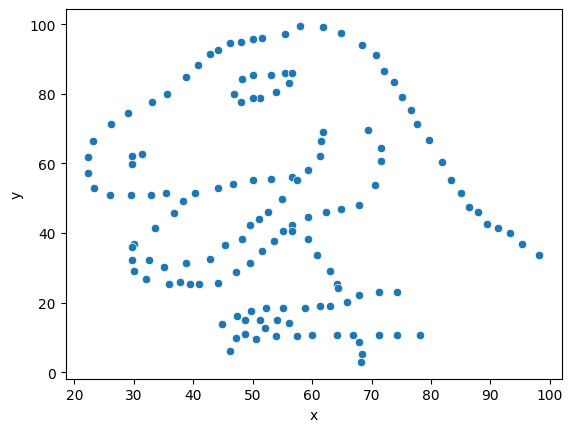

In [3]:
sns.scatterplot(data=data, x='x', y='y')

**Visualizations are useful for...**

- **Understanding your data**
    - Descriptive statistics are important, but they don't provide the full story...
    - Before jumping directly to analyzing our data, it is important to visualize them
    
<br> 

- For more examples: https://www.research.autodesk.com/publications/same-stats-different-graphs/

**Let's now review some visualization principles**


In [4]:
pheno_file = ('participants.tsv')

pheno = pandas.read_csv(pheno_file, sep='\t')

pheno.head()

,participant_id,Age,AgeGroup,Child_Adult,Gender,Handedness,ToM Booklet-Matched,ToM Booklet-Matched-NOFB,FB_Composite,FB_Group,WPPSI BD raw,WPPSI BD scaled,KBIT_raw,KBIT_standard,DCCS Summary,Scanlog: Scanner,Scanlog: Coil,Scanlog: Voxel slize,Scanlog: Slice Gap
0,sub-pixar001,4.774812,4yo,child,M,R,0.80,0.736842,6.0,pass,22.0,13.0,NaN,NaN,3.0,3T1,7-8yo 32ch,3mm iso,0.1
1,sub-pixar002,4.856947,4yo,child,F,R,0.72,0.736842,4.0,inc,18.0,9.0,NaN,NaN,2.0,3T1,7-8yo 32ch,3mm iso,0.1
2,sub-pixar003,4.153320,4yo,child,F,R,0.44,0.421053,3.0,inc,15.0,9.0,NaN,NaN,3.0,3T1,7-8yo 32ch,3mm iso,0.1
3,sub-pixar004,4.473648,4yo,child,F,R,0.64,0.736842,2.0,fail,17.0,10.0,NaN,NaN,3.0,3T1,7-8yo 32ch,3mm iso,0.2
4,sub-pixar005,4.837782,4yo,child,F,R,0.60,0.578947,4.0,inc,13.0,5.0,NaN,NaN,2.0,3T1,7-8yo 32ch,3mm iso,0.2


What are our different variables?

In [7]:
pheno.columns

Index(['participant_id', 'Age', 'AgeGroup', 'Child_Adult', 'Gender',
       'Handedness', 'ToM Booklet-Matched', 'ToM Booklet-Matched-NOFB',
       'FB_Composite', 'FB_Group', 'WPPSI BD raw', 'WPPSI BD scaled',
       'KBIT_raw', 'KBIT_standard', 'DCCS Summary', 'Scanlog: Scanner',
       'Scanlog: Coil', 'Scanlog: Voxel slize', 'Scanlog: Slice Gap'],
      dtype='object')

### Univariate visualization

Let's start by having a quick look at the `summary statistics` and `distribution` of `Age` (continuous variable):

In [8]:
print(pheno['Age'].describe())

count    155.000000
mean      10.555189
std        8.071957
min        3.518138
25%        5.300000
50%        7.680000
75%       10.975000
max       39.000000
Name: Age, dtype: float64


<Axes: xlabel='Age', ylabel='Density'>

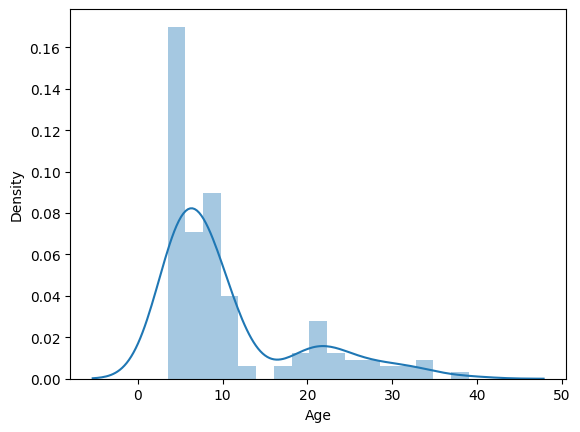

In [9]:
# simple histogram with seaborn
sns.distplot(pheno['Age'],
            #bins=30,          # increase "resolution"
            #color='black',    # change color
            #kde=False,        # get rid of KDE (y axis=N)
            #rug=True,         # add "rug"
            )

What kind of distribution do we have here? 

Let's try log normalization as a solution. Here's one way to do that:

<Axes: xlabel='Age'>

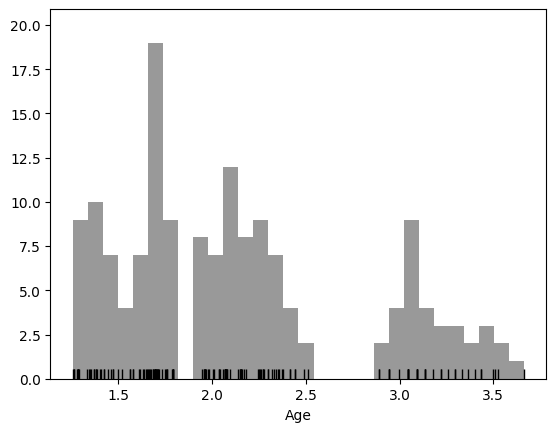

In [10]:
import numpy as np

log_age = np.log(pheno['Age'])
sns.distplot(log_age,
            bins=30,          
            color='black',    
            kde=False,         
            rug=True,          
            )

There is another approach for log-transforming that is perhaps better practice, and generalizable to *nearly any* type of transformation. With [sklearn](https://scikit-learn.org/stable/index.html), you can great a custom transformation object, which can be applied to different datasets.

_Advantages_ :
* Can be easily reversed at any time
* Perfect for basing transformation off one dataset and applying it to a different dataset

_Distadvantages_ :
* Expects 2D data (but that's okay)
* More lines of code :(

In [11]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, validate=True)

age2d = pheno['Age'].values.reshape(-1,1)
log_transformer.fit(age2d)

sk_log_Age = log_transformer.transform(age2d)

Are two log transformed datasets are equal?

In [12]:
all(sk_log_Age[:,0] == log_age)

True

And we can easily reverse this normalization to return to the original values for age.

In [13]:
reverted_age = log_transformer.inverse_transform(age2d)

The inverse transform should be the same as our original values:

In [14]:
all(reverted_age == age2d)

True

#### Different ways to plot univariate scalar :

- Histogram : `sns.histplot(x)` or `sns.displot(x)`
- KDE plot: `sns.kdeplot(x)`
- Strip plot: `sns.stripplot(x)`
- Ranked strip: `sns.stripplot(rank(x), x)`

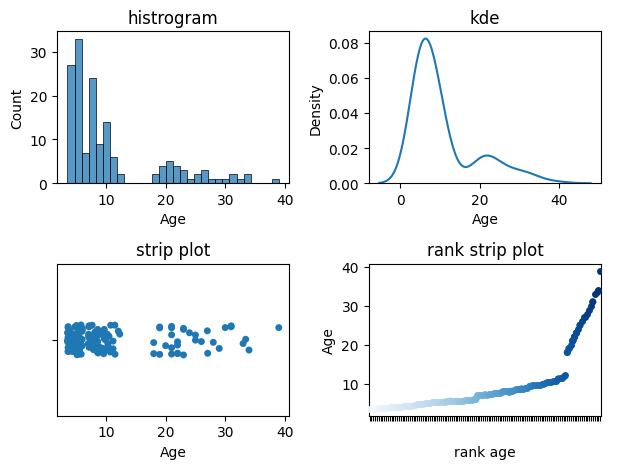

In [15]:
from scipy.stats import rankdata

fig, ax = plt.subplots(2,2) #,figsize=(8,8))
sns.histplot(pheno['Age'], bins=30, kde=False, ax=ax[0,0])
ax[0,0].set_title('histrogram')
sns.kdeplot(pheno['Age'], ax=ax[0, 1])
ax[0,1].set_title('kde')
sns.stripplot(pheno['Age'], ax=ax[1,0])
ax[1,0].set_title('strip plot')
sns.stripplot(rankdata(pheno['Age']), pheno['Age'], ax=ax[1,1], palette='Blues')
ax[1,1].tick_params(axis='x', labelcolor='w')
ax[1,1].set_title('rank strip plot')
ax[1,1].set_xlabel('rank age')
plt.tight_layout();

Another strategy would be `categorization`. Two type of `categorization` have already been done for us in this dataset. We can visualize this with `pandas value_counts()` or with `seaborn countplot()`:

In [16]:
# Value counts of AgeGroup
pheno['AgeGroup'].value_counts()

AgeGroup
5yo       34
8-12yo    34
Adult     33
7yo       23
3yo       17
4yo       14
Name: count, dtype: int64

([], [])

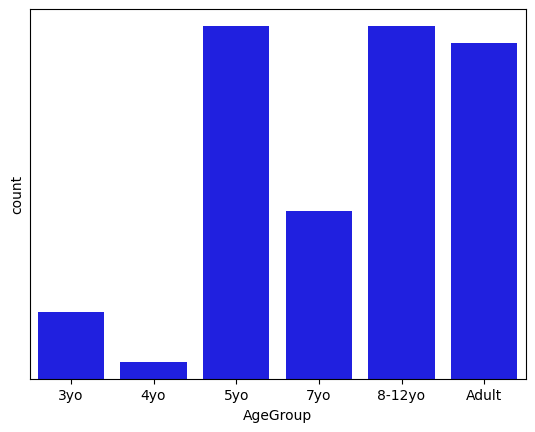

In [17]:
age_count=pheno['AgeGroup'].value_counts().reset_index().sort_values(by=['AgeGroup'])
sns.barplot(data=age_count, x='AgeGroup', y='count', color='b')
plt.ylim(13, 35)
plt.yticks([])

(13.0, 35.0)

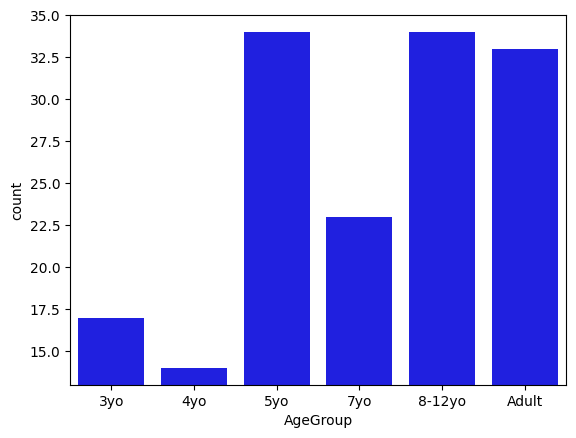

In [18]:
sns.barplot(data=age_count, x='AgeGroup', y='count', color='b')
plt.ylim(13, 35)

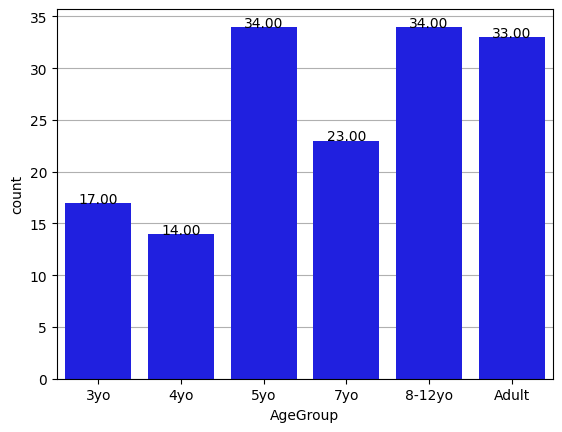

In [22]:
sns.barplot(data=age_count, x='AgeGroup', y='count', color='b')
plt.rcParams['axes.axisbelow'] = True
plt.grid(axis='y')

for i in range(len(age_count)):
    plt.text(i, age_count['count'].iloc[i], '{0:.2f}'.format(age_count['count'].iloc[i]), ha='center')

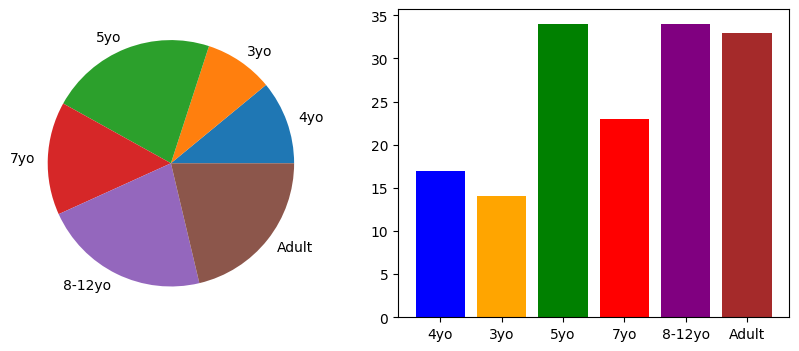

In [20]:
fig, ax = plt.subplots(1,2, figsize=(10,4), width_ratios=[4, 5])
colors=['blue', 'orange', 'green', 'red', 'purple', 'brown']
ax[0].pie(pheno.groupby('AgeGroup').count()['participant_id'], labels=pheno['AgeGroup'].unique())
ax[1].bar(pheno['AgeGroup'].unique(), pheno.groupby('AgeGroup').count()['participant_id'], color=colors);

<Axes: xlabel='Child_Adult', ylabel='count'>

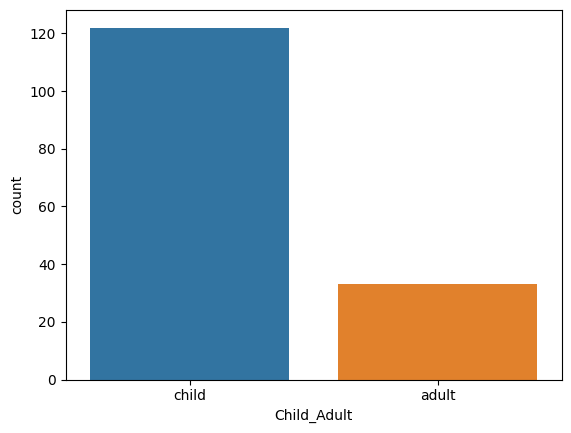

In [21]:
# Countplot of Child_Adult

sns.countplot(pheno['Child_Adult'])

### Bivariate visualization: 

- Categorical x categorical
- Categorical x scalar
- Scalar x scalar

### Bivariate visualization: Linear x Linear

Cool! Now let's play around a bit with `bivariate visualization`. 

For example, we could look at the association between `age` and a cognitive phenotype like `Theory of Mind` or `"intelligence"`. We can start with a `scatterplot`. A quick and easy `scatterplot` can be built with `regplot()`:

<Axes: xlabel='Age', ylabel='ToM Booklet-Matched'>

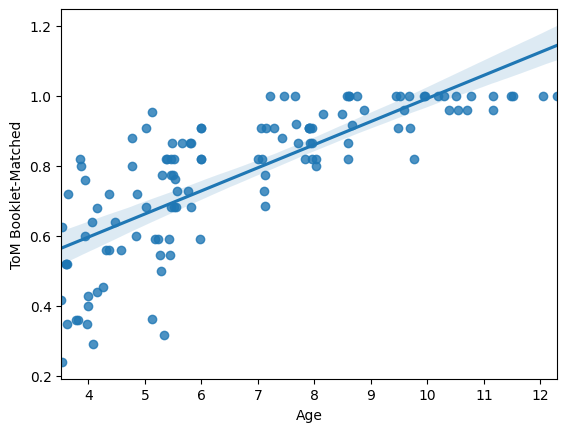

In [23]:
sns.regplot(x=pheno['Age'], y=pheno['ToM Booklet-Matched'])

`regplot()` will automatically drop missing values (`pairwise`). There are also a number of handy and very quick arguments to change the nature of the plot:

<Axes: xlabel='Age', ylabel='ToM Booklet-Matched'>

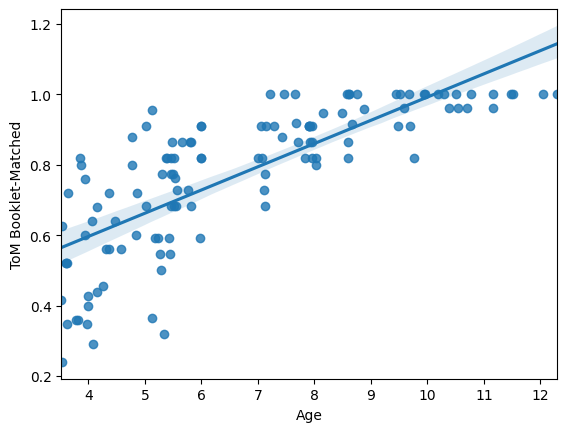

In [24]:
## Try uncommenting these lines (one at a time) to see how the plot changes.

sns.regplot(x=pheno['Age'], y=pheno['ToM Booklet-Matched'],
           #order=2,        # fit a quadratic curve
           #lowess=True,    # fit a lowess curve
           #fit_reg = False # no regression line
           #marker = ''     # no points
           #marker = 'x',   # xs instead of points
           )

Take a minute to try plotting another set of variables. Don't forget -- you may have to change the data type!

In [25]:
#sns.regplot(x=, y=)


This would be as good a time as any to remind you that `seaborn` is built on top of `matplotlib`. Any `seaborn` object could be built from scratch from a `matplotlib` object. For example, `regplot()` is built on top of `plt.scatter`:

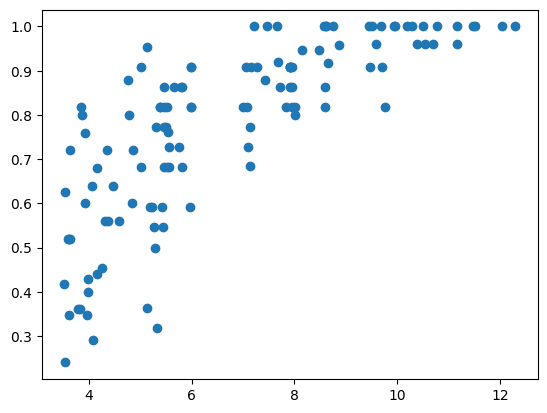

In [26]:
plt.scatter(x=pheno['Age'], y=pheno['ToM Booklet-Matched'])


If you want to get really funky/fancy, you can play around with `jointplot()` and change the `"kind"` argument.

However, note that `jointplot` is a different `type` of `object` and therefore follows different rules when it comes to editing. More on this later ...

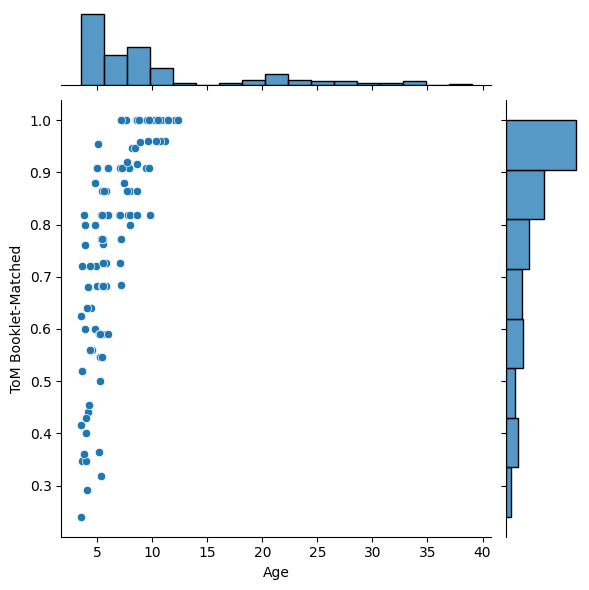

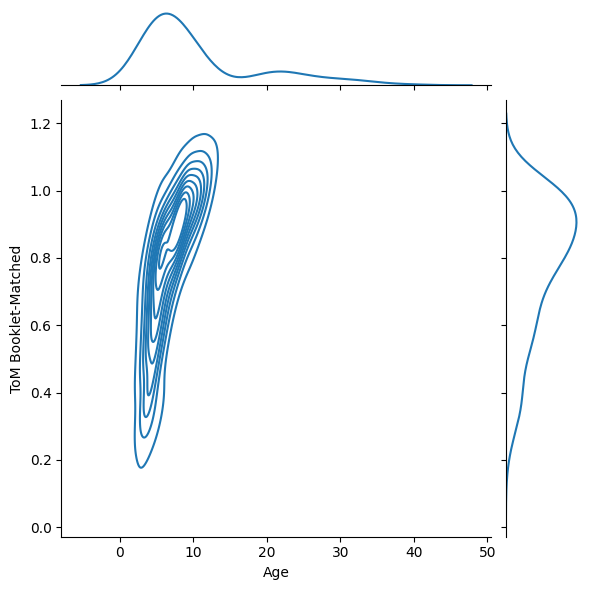

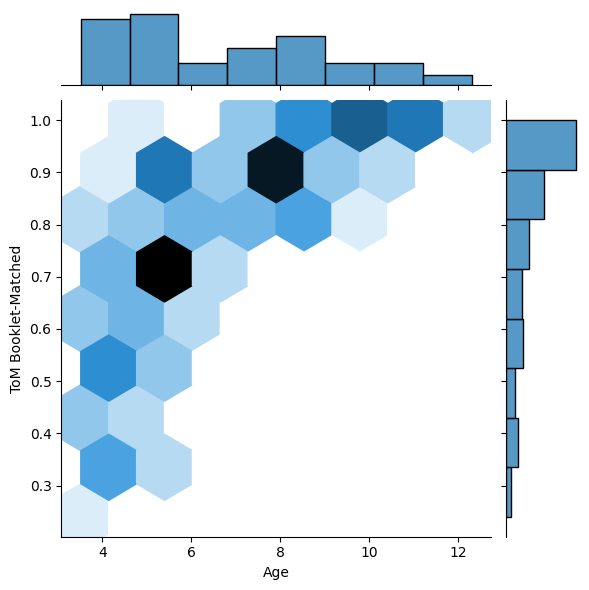

In [27]:
for kind in ['scatter','kde','hex']:
    sns.jointplot(x=pheno['Age'], y=pheno['ToM Booklet-Matched'],
                  kind=kind)

    plt.show()

That last one was a bit weird, eh? These `hexplots` are really built for larger sample sizes. Just to showcase this, let's plot a `hexplot` 1000 samples of some `random data`. Observe how the `hexplot` deals with `density` in a way that the `scatterplot` cannot.

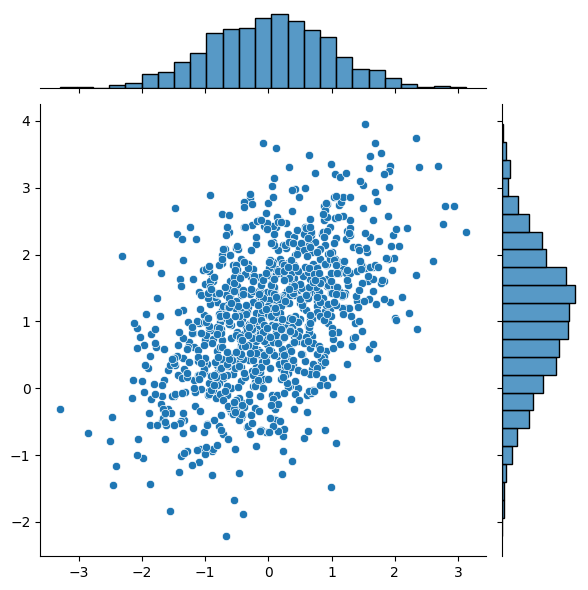

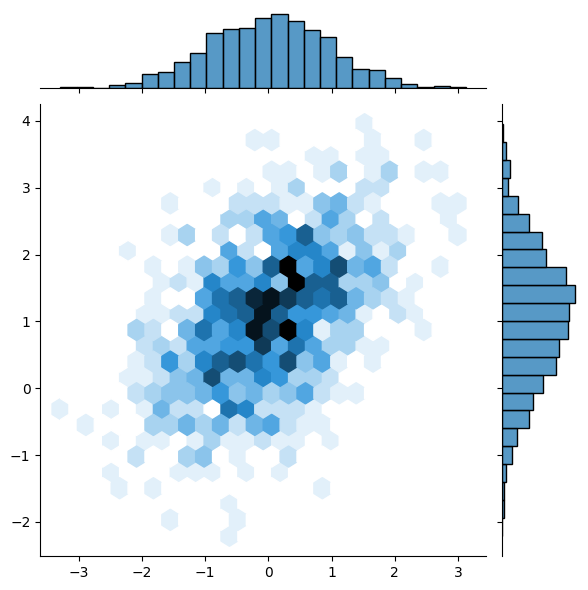

In [28]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, 1000).T
sns.jointplot(x=x, y=y, kind="scatter")
sns.jointplot(x=x, y=y, kind="hex")



More on dealing with "overplotting" here: https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/.

However, note that `jointplot` is a different type of object and therefore follows different rules when it comes to editing. This is perhaps one of the biggest drawbacks of `seaborn`.

For example, look at how the same change requires different syntax between `regplot` and `jointplot`:

Text(0.5, 0, 'Participant Age')

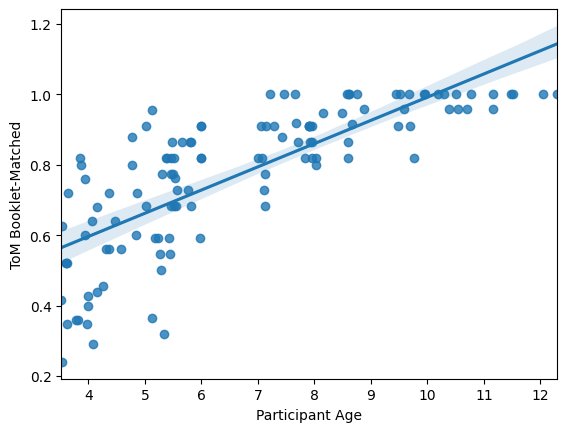

In [29]:
sns.regplot(x=pheno['Age'], y=pheno['ToM Booklet-Matched'])
plt.xlabel('Participant Age')

Text(0.5, 36.72222222222221, 'Participant Age')

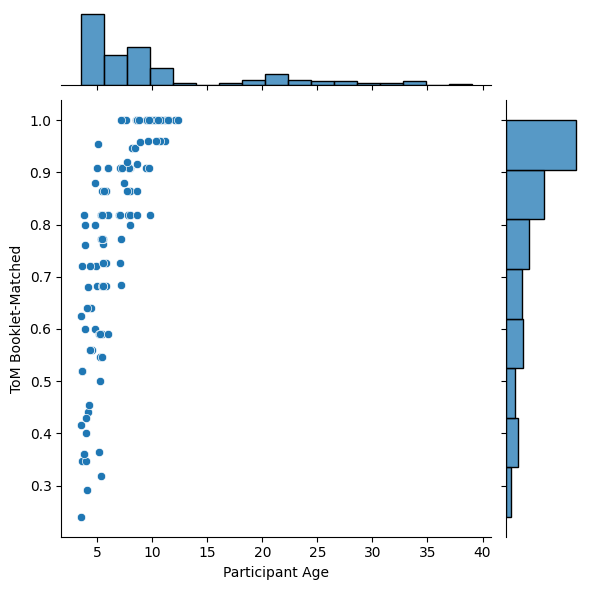

In [30]:
g = sns.jointplot(x=pheno['Age'], y=pheno['ToM Booklet-Matched'],
                  kind='scatter')
g.ax_joint.set_xlabel('Participant Age')

Finally, `lmplot()` is another nice `scatterplot` option for observing `multivariate interactions`.

However, `lmplot()` cannot simply take two `arrays` as input. Rather (much like `R`), you must pass `lmplot` some data (in the form of a `pandas DataFrame` for example) and `variable` names. Luckily for us, we already have our data in a `pandas DataFrame`, so this should be easy.

Let's look at how the relationship between `Age` and `Theory of Mind` varies by `Gender`. We can do this using the `"hue"`, `"col"` or `"row"` arguments: 

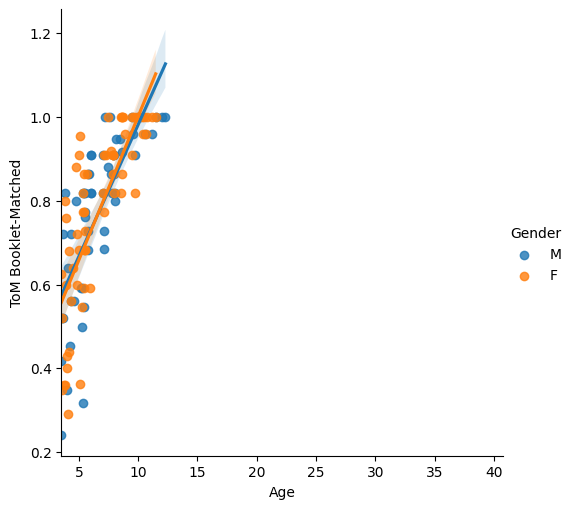

In [31]:
sns.lmplot(x='Age', y = 'ToM Booklet-Matched', 
           data = pheno, hue='Gender')

Unfortunately, these plots can be a bit sub-optimal at times. The `regplot` is perhaps more flexible. You can read more about this type of plotting here: https://seaborn.pydata.org/tutorial/distributions.html.

### Bivariate visualization: Linear x Categorical

Let's take a quick look at how to look at `bivariate relationships` when one `variable` is `categorical` and the other is `scalar`.

For consistency can continue to look at the same relationship, but look at `"AgeGroup"` instead of `age`.

There are many ways to visualize such relationships. While there are some advantages and disadvantes of each type of plot, much of the choice will come down to personal preference.

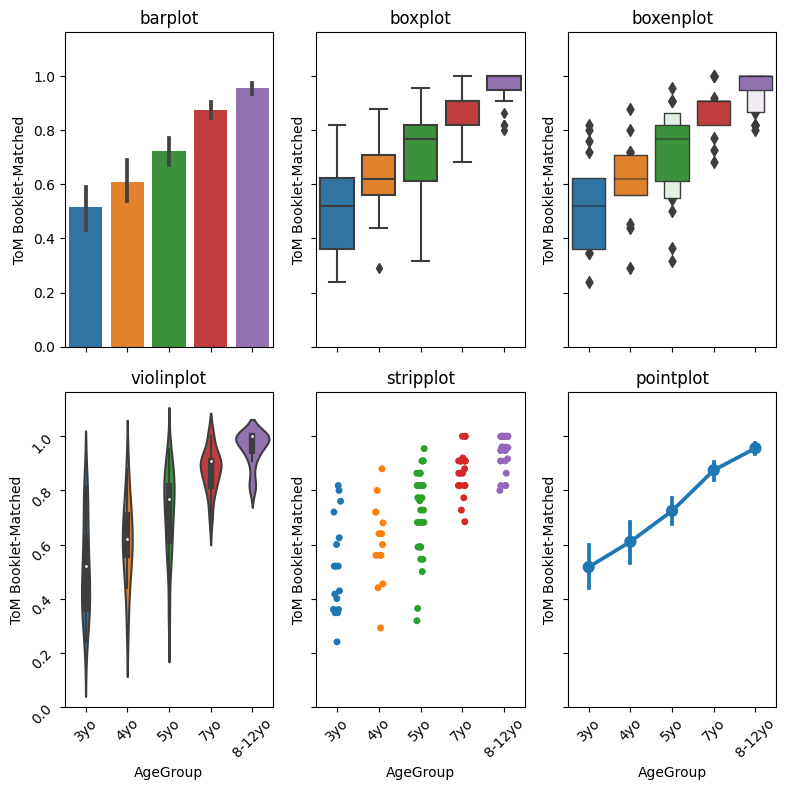

In [32]:
## Categorical x Scalar
order = sorted(pheno.AgeGroup.unique())[:-1]

fig, ax = plt.subplots(2, 3, figsize=(8, 8), sharex=True, sharey=True)

sns.barplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched', 
            data = pheno[pheno.AgeGroup!='Adult'], 
            order=order,
            ax=ax[0,0])
ax[0,0].set_xlabel('')
ax[0,0].set_title('barplot')


sns.boxplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched', 
            data = pheno[pheno.AgeGroup!='Adult'],
            order=order,
            ax=ax[0,1])
ax[0,1].set_xlabel('')
ax[0,1].set_title('boxplot')

sns.boxenplot(x='AgeGroup', 
              y = 'ToM Booklet-Matched', 
              data = pheno[pheno.AgeGroup!='Adult'], 
              order=order,
              ax=ax[0,2])
ax[0,2].set_xlabel('')
ax[0,2].set_title('boxenplot')

sns.violinplot(x='AgeGroup', 
               y = 'ToM Booklet-Matched', 
               data = pheno[pheno.AgeGroup!='Adult'], 
               order=order,
               ax=ax[1,0])
ax[1,0].set_title('violinplot')
ax[1,0].tick_params(labelrotation=45)

sns.stripplot(x='AgeGroup', 
              y = 'ToM Booklet-Matched', 
              data = pheno[pheno.AgeGroup!='Adult'], 
              order=order,
              ax=ax[1,1])
ax[1,1].set_title('stripplot')
ax[1,1].tick_params(labelrotation=45)


sns.pointplot(x='AgeGroup', 
              y = 'ToM Booklet-Matched', 
              data = pheno[pheno.AgeGroup!='Adult'], 
              order=order,
              ax=ax[1,2])
ax[1,2].set_title('pointplot')
ax[1,2].tick_params(labelrotation=45)

plt.tight_layout()

Generally, `lineplots` and `barplots` are frowned upon because they do not show the actual data nor give a good representation of the variance, and therefore can mask troublesome distributions and outliers.

But perhaps you're really into `barplots`? No problem! One nice thing about many `seaborn plots` is that they can be overlaid very easily. Just call two plots at once before doing `plt.show()` (or in this case, before running the cell). Just overlay a `stripplot` on top!

<Axes: xlabel='AgeGroup', ylabel='ToM Booklet-Matched'>

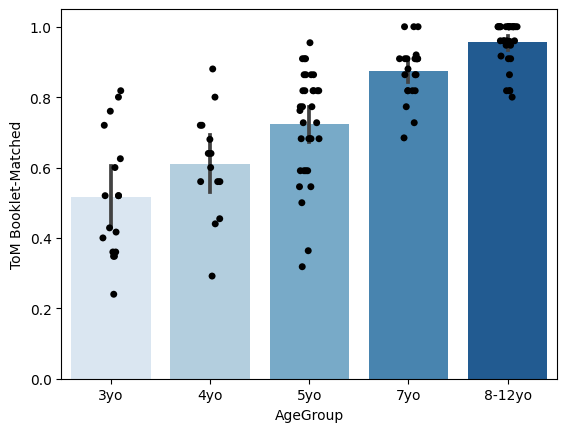

In [33]:
sns.barplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
            order = order, palette='Blues')

sns.stripplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
            jitter=True,
            order = order, color = 'black')

You can find more info on these types of plots here: https://seaborn.pydata.org/tutorial/categorical.html.

Having trouble deciding which type of plot you want to use? Checkout the raincloud plot, which combines multiple types of plots to achieve a highly empirical visualization. 

Read more about it here:
https://wellcomeopenresearch.org/articles/4-63/v1?src=rss.



<Axes: xlabel='AgeGroup', ylabel='ToM Booklet-Matched'>

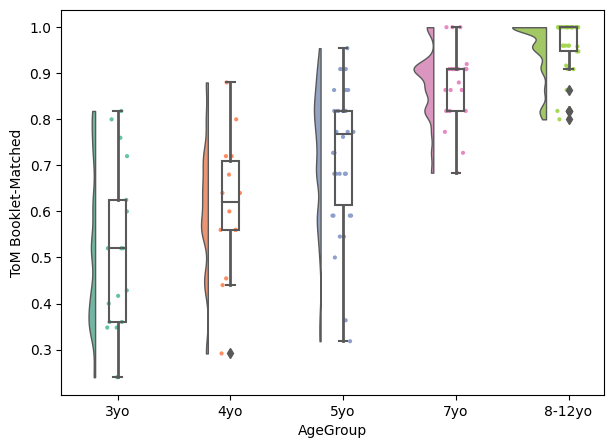

In [34]:
import ptitprince as pt

dx = "AgeGroup"; dy = "ToM Booklet-Matched"; ort = "v"; pal = "Set2"; sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

pt.RainCloud(x = dx, y = dy, data = pheno[pheno.AgeGroup!='Adult'], order=order, palette = pal, bw = sigma,
                 width_viol = .6, ax = ax, orient = ort)

### Bivariate visualization: Categorical x Categorical

What if we want to observe the relationship between two `categorical variables`? Since we are usually just looking at `counts` or `percentages`, a simple `barplot` is fine in this case.

Let's look at `AgeGroup` x `Gender`. `Pandas.crosstab` helps sort the data in an intuitive way. 

In [35]:
pandas.crosstab(index=pheno['AgeGroup'],
                columns=pheno['Gender'],)

Gender,F,M
AgeGroup,,
3yo,10,7
4yo,8,6
5yo,16,18
7yo,11,12
8-12yo,19,15
Adult,20,13


<Axes: xlabel='AgeGroup'>

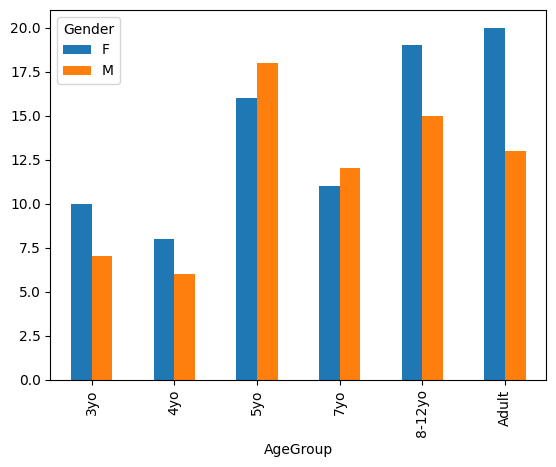

In [36]:
#We can actually plot this directly from `pandas`.

pandas.crosstab(index=pheno['AgeGroup'],
                columns=pheno['Gender'],).plot.bar()

The above plot gives us absolute `counts`. Perhaps we'd rather visualize differences in `proportion` across `age groups`. Unfortunately we must do this manually.

<Axes: xlabel='AgeGroup'>

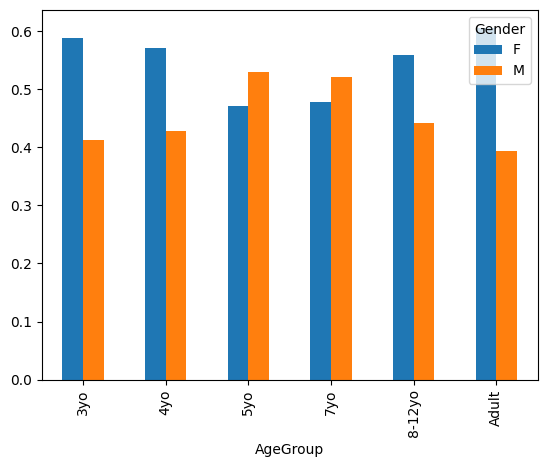

In [37]:
crosstab = pandas.crosstab(index=pheno['AgeGroup'],
                columns=pheno['Gender'],)

crosstab.apply(lambda r: r/r.sum(), axis=1).plot.bar()


### Style points

You will be surprised to find out exactly how customizable your `python plots` are. Its not so important when you're first `exploring` your data, but `aesthetic value` can add a lot to `visualizations` you are communicating in the form of `manuscripts`, `posters` and `talks`.

Once you know the relationships you want to `plot`, spend time adjusting the `colors`, `layout`, and fine details of your `plot` to `maximize interpretability`, `transparency`, and if you can spare it, `beauty`!

You can easily edit `colors` using many `matplotlib` and `python arguments`, often listed as `col`, `color`, or `palette`. 

<Axes: xlabel='AgeGroup', ylabel='ToM Booklet-Matched'>

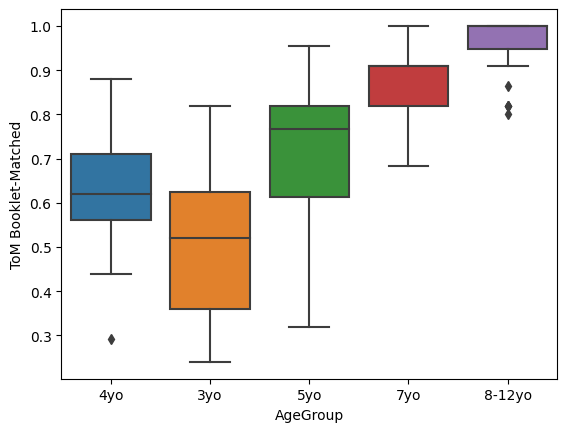

In [38]:
## try uncommenting one of these lines at a time to see how the 
## graph changes

sns.boxplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
            #palette = 'Greens_d',
            #color = 'black'
           )

You can find more about your palette choices here: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html.

More about your color choices here:
https://matplotlib.org/3.1.0/gallery/color/named_colors.html.

You can also easily change the style of the plots by setting `"style"` or `"context"`:

<Axes: xlabel='AgeGroup', ylabel='ToM Booklet-Matched'>

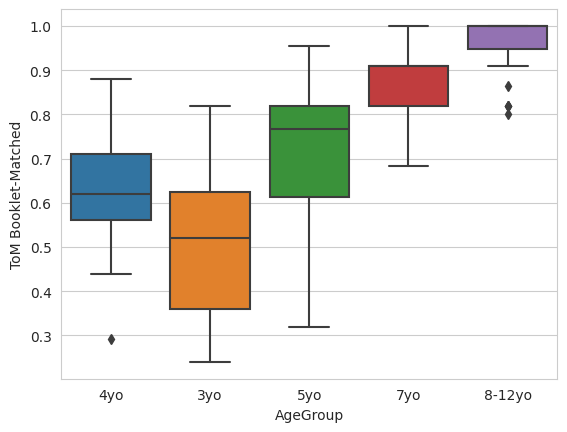

In [39]:
sns.set_style('whitegrid')
sns.boxplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
           )

<Axes: xlabel='AgeGroup', ylabel='ToM Booklet-Matched'>

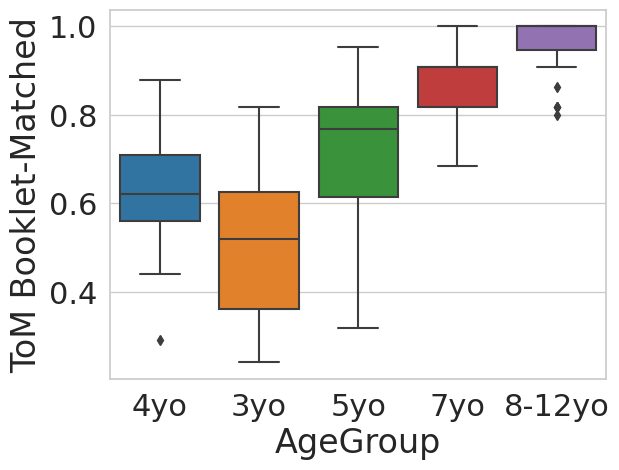

In [40]:
sns.set_context('notebook',font_scale=2)
sns.boxplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
           )

Notice these changes do not reset after the `plot` is shown. To learn more about controlling `figure aesthetics`, as well as how to produce temporary style changes, visit here: https://seaborn.pydata.org/tutorial/aesthetics.html.

Finally, remember that these `plots` are `extremely customizable`. Literally every aspect can be changed. Once you know the relationship you want to `plot`, don't be afraid to spend a good chunk of time `tweaking` your `plot` to perfection:

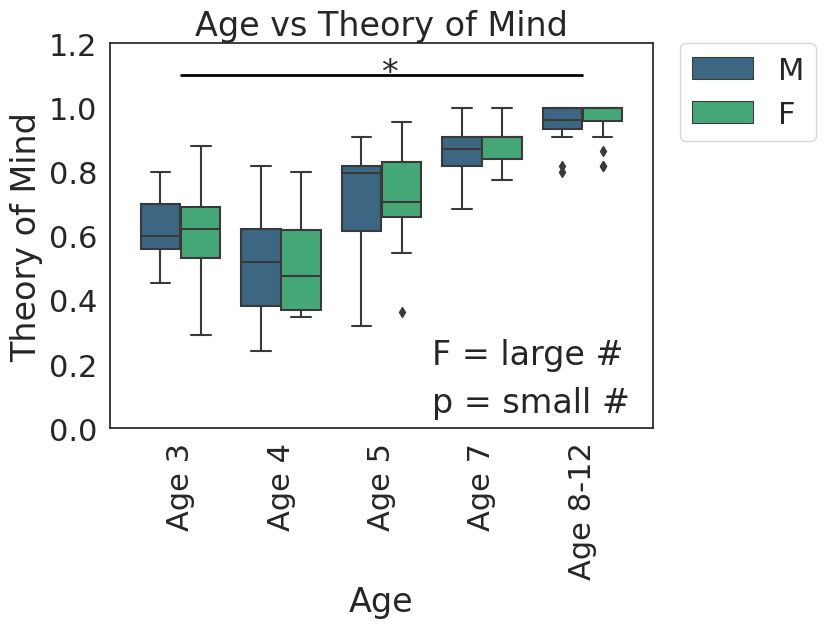

In [41]:
# set style
sns.set_style('white')
sns.set_context('notebook',font_scale=2)

# set figure size
plt.subplots(figsize=(7,5))

g = sns.boxplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            hue = 'Gender',
            data = pheno[pheno.AgeGroup!='Adult'],
           palette = 'viridis')

# Change X axis
new_xtics = ['Age 3','Age 4','Age 5', 'Age 7', 'Age 8-12']
g.set_xticklabels(new_xtics, rotation=90)
g.set_xlabel('Age')

# Change Y axis
g.set_ylabel('Theory of Mind')
g.set_yticks([0,.2,.4,.6,.8,1,1.2])
g.set_ylim(0,1.2)

# Title
g.set_title('Age vs Theory of Mind')

# Add some text
g.text(2.5,0.2,'F = large #')
g.text(2.5,0.05,'p = small #')

# Add significance bars and asterisks
plt.plot([0,0, 4, 4], 
         [1.1, 1.1, 1.1, 1.1], 
         linewidth=2, color='k')
plt.text(2,1.08,'*')

# Move figure legend outside of plot

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Some visualization principles...**

- Choose the appropriate plotting strategy for your data type
    - https://python-graph-gallery.com/
- Prioritize plots where we can see indivual data points
    - `stripplot()` or `scatterplot()`
- Be careful about your colormap !
    - Perceptually uniform colormaps (i.e., match between the color space and the space of your data)
        - [Nunez et al. (2018; PLos One)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0199239)
    - Color vision deficiency friendly colormaps 
        - https://cmweather.readthedocs.io/en/latest/api.html
    - [More colormaps and style !](https://matplotlib.org/thirdpartypackages/#colormaps-and-styles)


**Some visualization principles...**

- Choose the appropriate plotting strategy for your data type
    - https://python-graph-gallery.com/
- **Prioritize plots where we can see indivual data points**
    - `stripplot()` or `scatterplot()`
- Be careful about your colormap !
    - Perceptually uniform colormaps (i.e., match between the color space and the space of your data)
        - [Nunez et al. (2018; PLos One)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0199239)
    - Color vision deficiency friendly colormaps 
        - https://cmweather.readthedocs.io/en/latest/api.html
    - [More colormaps and style !](https://matplotlib.org/thirdpartypackages/#colormaps-and-styles)

In [42]:
# Just for the purpose of the visualization, we will assume that `ToM Booklet-Matched-NOFB` is a post experiment measure
data_pre_post =  pheno[pheno['AgeGroup']!='Adult'][['participant_id', 'ToM Booklet-Matched', 'ToM Booklet-Matched-NOFB']]
data_pre_post = data_pre_post.melt(id_vars='participant_id', var_name='pre_post', value_name='values')
data_pre_post.head()

,participant_id,pre_post,values
0,sub-pixar001,ToM Booklet-Matched,0.80
1,sub-pixar002,ToM Booklet-Matched,0.72
2,sub-pixar003,ToM Booklet-Matched,0.44
3,sub-pixar004,ToM Booklet-Matched,0.64
4,sub-pixar005,ToM Booklet-Matched,0.60


Text(0, 0.5, 'Scores')

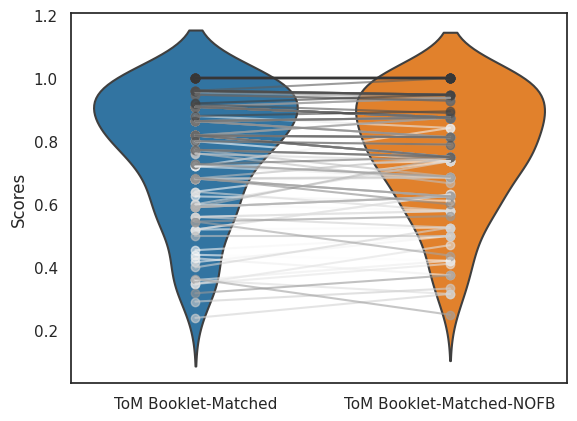

In [43]:
sns.set_context('notebook',font_scale=1)
sns.violinplot(x='pre_post', y='values', data=data_pre_post, inner=None)

cmaps=plt.cm.binary(np.linspace(0,1,len(pheno)))

for i, row in pheno.iterrows():
    x = [0, 1]
    y = [row['ToM Booklet-Matched'], row['ToM Booklet-Matched-NOFB']]
    plt.plot(x, y, alpha=0.6, color=cmaps[i])
    plt.scatter(x ,y, alpha=0.6, color=cmaps[i])

plt.xlabel('')
plt.ylabel('Scores')

**Some visualization principles...**

- Choose the appropriate plotting strategy for your data type
    - https://python-graph-gallery.com/
- Prioritize plots where we can see indivual data points
    - `stripplot()` or `scatterplot()`
- **Be careful about your colormap !**
    - Perceptually uniform colormaps (i.e., match between the color space and the space of your data)
        - [Nunez et al. (2018; PLos One)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0199239)
    - Color vision deficiency friendly colormaps 
        - [matplotlib predefined CVD friendly style](https://matplotlib.org/stable/users/prev_whats_new/whats_new_2.2.html#new-style-colorblind-friendly-color-cycle) : `plt.style.use('tableau-colorblind10')`
        - https://cmweather.readthedocs.io/en/latest/api.html
        - [Practical guide for CVD friendly plot](https://www.datylon.com/blog/data-visualization-for-colorblind-readers): It's not always about just changing the colormap !
    - [More colormaps and style !](https://matplotlib.org/thirdpartypackages/#colormaps-and-styles)

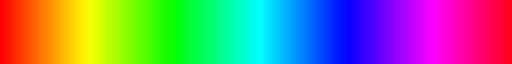

In [44]:
from matplotlib import colormaps

colormaps['hsv'] #Low perceptual difference in part of the color space, or increased perceptual differences

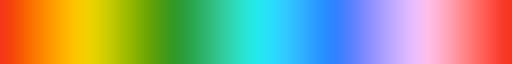

In [45]:
#https://colorcet.com/
import colorcet as cc 

cc.cm['cyclic_rygcbmr_50_90_c64']

**Some visualization principles...**

- Choose the appropriate plotting strategy for your data type
    - https://python-graph-gallery.com/
- Prioritize plots where we can see indivual data points
    - `stripplot()` or `scatterplot()`
- **Be careful about your colormap !**
    - Perceptually uniform colormaps (i.e., match between the color space and the space of your data)
        - [Nunez et al. (2018; PLos One)](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0199239)
    - Color vision deficiency friendly colormaps 
        - [matplotlib predefined CVD friendly style](https://matplotlib.org/stable/users/prev_whats_new/whats_new_2.2.html#new-style-colorblind-friendly-color-cycle) : `plt.style.use('tableau-colorblind10')`
        - https://cmweather.readthedocs.io/en/latest/api.html
        - [Practical guide for CVD friendly plot](https://www.datylon.com/blog/data-visualization-for-colorblind-readers): It's not always about just changing the colormap !
        - **Restrained from the rainbow**: [fixthejet](https://github.com/smsaladi/fixthejet?tab=readme-ov-file)
    - [More colormaps and style !](https://matplotlib.org/thirdpartypackages/#colormaps-and-styles)

**A word on interactive plots**

- Domain-general packages: [`ipywidgets`](https://ipywidgets.readthedocs.io/en/stable/#), [`bokeh`](https://bokeh.org/) and [`plotly`](https://plotly.com/python/) (+ [`Dash`](https://dash.plotly.com/layout))
- For a comparison between `bokeh` and `plotly`, see https://pauliacomi.com/2020/06/07/plotly-v-bokeh.html

In [46]:
import plotly.io as pio
pio.renderers.default = 'iframe'

In [47]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=pheno[pheno['AgeGroup']!='Adult']['Age'],
    y=pheno[pheno['AgeGroup']!='Adult']['ToM Booklet-Matched'],
    mode='markers',
    #customdata=pheno[pheno['AgeGroup']!='Adult']['participant_id'],
    #hovertemplate='(x, y): (%{x:.2f},%{y:.2f})<br> id: %{customdata}'
))
""" To add the axes
fig.update_layout(
    xaxis=dict(
        title=dict(
            text='Age'
        )
    ),
    yaxis=dict(
        title=dict(
            text='ToM Bookle-Matched'
        )
    )
)
"""

fig.show()

In [48]:
import plotly.express as px # plotly.express is an higher-level interface to Plotly

fig = px.scatter(pheno[pheno['AgeGroup']!='Adult'], x='Age', y='ToM Booklet-Matched') #, hover_data='participant_id')

fig.show()

In [49]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

p=figure(width=800, height=400)

p.scatter(
    x=pheno[pheno['AgeGroup']!='Adult']['Age'], 
    y=pheno[pheno['AgeGroup']!='Adult']['ToM Booklet-Matched'],
    size=10,
    alpha=0.5
)

show(p)

Loading BokehJS ...

In [50]:
from bokeh.models import HoverTool, ColumnDataSource

output_notebook()

id_participant = pheno[pheno['AgeGroup']!='Adult']['participant_id']

source = ColumnDataSource(
    data=dict(
        x=pheno[pheno['AgeGroup']!='Adult']['Age'], 
        y=pheno[pheno['AgeGroup']!='Adult']['ToM Booklet-Matched'],
        id_participant=id_participant
    ),
)
hover = HoverTool(tooltips=[
    ("(x,y)", "(@x, @y)"),
    ("id_participant", "@id_participant")
])

p=figure(width=800, height=400, tools=[hover])

p.scatter(
    x='x',
    y='y', 
    source=source,
    size=10,
    alpha=0.5
)

show(p)

Loading BokehJS ...

**A note on some domain-specific plotting packages**

- [pysurfer](https://pysurfer.github.io/)
- [nilearn plotting functions](https://nilearn.github.io/stable/modules/plotting.html)
- [mne plotting functions](https://mne.tools/stable/api/visualization.html)
- And more... See [Chopra et al., 2023 (Aperture Neuro)](https://apertureneuro.org/article/85104-a-practical-guide-for-generating-reproducible-and-programmatic-neuroimaging-visualizations)

In [51]:
# Following nilearn's Plotting tools in nilearn tutorial
# https://nilearn.github.io/stable/auto_examples/01_plotting/plot_demo_plotting.html

from nilearn import datasets

stat_img = datasets.load_sample_motor_activation_image()

stat_img

'/home/user/Documents/course-materials-2020/venv/lib/python3.9/site-packages/nilearn/datasets/data/image_10426.nii.gz'

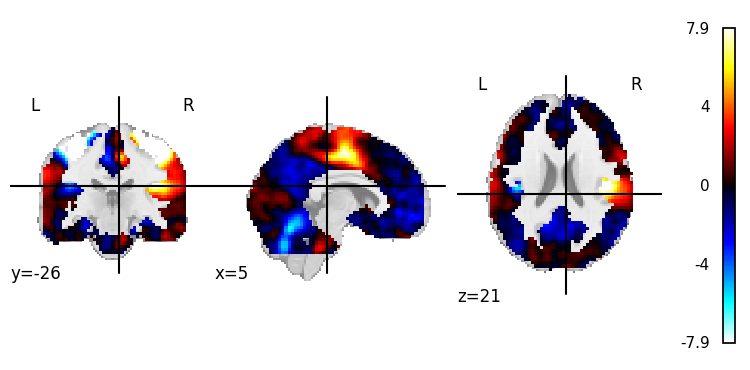

In [52]:
# https://nilearn.github.io/stable/plotting/index.html#plotting
from nilearn import plotting

plotting.plot_stat_map(
    stat_img,
    #threshold=3,
    #display_mode='mosaic',
    #draw_cross=False,
    #annotate=False,
)

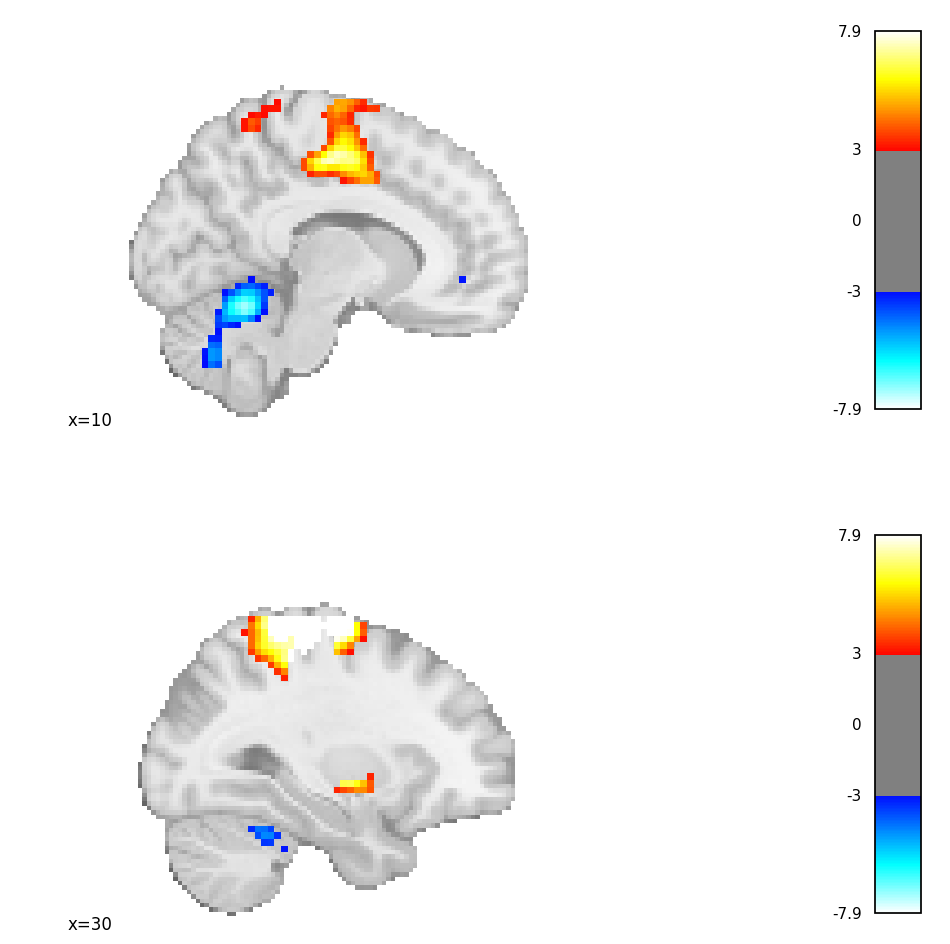

In [53]:
figure, axs = plt.subplots(2, 1, figsize=(12,12))

plotting.plot_stat_map(
    stat_img, 
    cut_coords=(10,),
    display_mode='x',
    threshold=3,
    axes=axs[0],
    #annotate=False,
    #black_bg=False,
    #colorbar=False,
    #dim=0.3,
    #alpha=1
)


plotting.plot_stat_map(
    stat_img, 
    cut_coords=(30,),
    display_mode='x',
    threshold=3,
    axes=axs[1],
    #annotate=False,
    #black_bg=False,
    #dim=0.3,
    #alpha=1
)


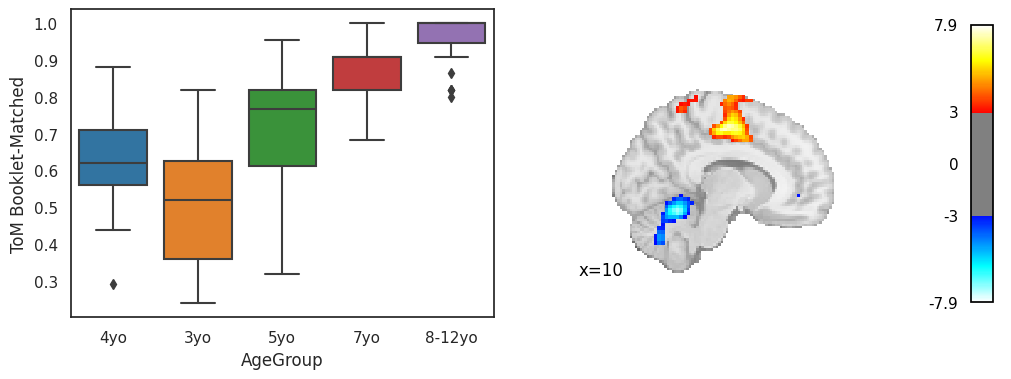

In [54]:
figure, axs = plt.subplots(1, 2, figsize=(12, 4))


sns.boxplot(x='AgeGroup', 
            y = 'ToM Booklet-Matched',
            data = pheno[pheno.AgeGroup!='Adult'],
            ax=axs[0]
           )

plotting.plot_stat_map(
    stat_img, 
    cut_coords=(10,),
    display_mode='x',
    threshold=3,
    axes=axs[1],
)

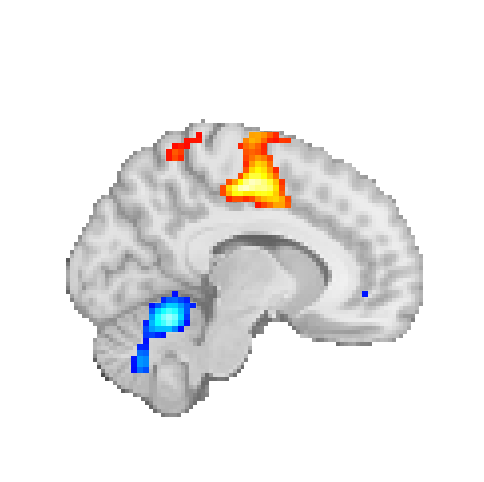

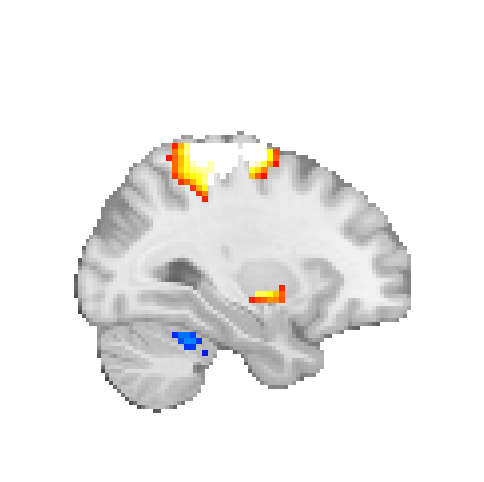

In [55]:
figure, axs = plt.subplots(figsize=(6, 6))

plotting.plot_stat_map(
    stat_img, 
    cut_coords=(10,),
    display_mode='x',
    threshold=3,
    axes=axs,
    annotate=False,
    black_bg=False,
    colorbar=False,
    dim=0.3,
    alpha=1
)

figure.savefig('fig1.png', transparent=True)

figure, axs = plt.subplots(figsize=(6, 6))

plotting.plot_stat_map(
    stat_img, 
    cut_coords=(30,),
    display_mode='x',
    threshold=3,
    axes=axs,
    annotate=False,
    black_bg=False,
    colorbar=False,
    dim=0.3,
    alpha=1
)

figure.savefig('fig2.png', transparent=True)

In [57]:
# Now we will create a new figure combining the ones that we have created previously using librairie `pillow`
from PIL import Image

image1 = Image.open('fig1.png').convert('RGBA')
image2 = Image.open('fig2.png').convert('RGBA')

overlap = 400

base = Image.new("RGBA", ((image1.width + image2.width - overlap), max(image1.height, image2.height)), (0, 0, 0, 0))

base.paste(image1, (0, 0), image1)

overlay = Image.new("RGBA", ((image1.width + image2.width - overlap), max(image1.height, image2.height)), (0, 0, 0, 0))
overlay.paste(image2, (image1.width - overlap, 0), image2)

result = Image.alpha_composite(base, overlay)

result.show()
#result.save('combined_fig.png')

#### Recommended reading:

multidimensional plotting with seaborn: https://jovianlin.io/data-visualization-seaborn-part-3/

Great resource for complicated plots, creative ideas, and data!: https://python-graph-gallery.com/

A few don'ts of plotting: https://www.data-to-viz.com/caveats.html